In [1]:
import pandas as pd

##  1. Elaborating/Exploring Dataset using visuals for Feature Engineering/Data Preprocessing
*> Also known as `Exploratory Data Analysis(EDA)`*

In [74]:
dataset=pd.read_csv('titanic_train.csv')

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.shape 

(891, 12)

*`(rows,columns)`*

In [5]:
dataset.ndim

2

In [6]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Seaborn is more advanced than Pandas

In [8]:
import seaborn as sns

In [9]:
gender=dataset['Sex']

In [10]:
gender

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

*`countplot()` goes to the columns and counts the entries acc. to the category(if any) in the column`*

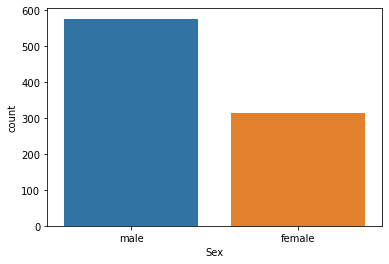

In [11]:
sns.countplot(gender)

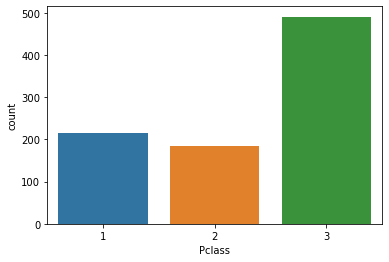

In [12]:
pclass=dataset['Pclass']
sns.countplot(pclass)

In [13]:
survived=dataset['Survived']

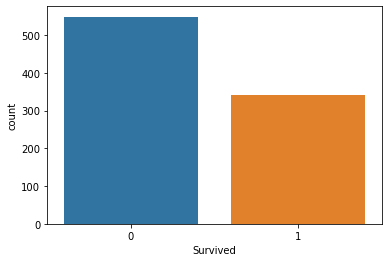

In [14]:
sns.countplot(survived)

*`countplot()` shows the count in a particular column ex: Survived,But if we want to view or compare Survived and Gender(or See how many males & females survived or died),then we have to use >> `hue`*
#### This is also known as Grouping or groupby, the process is known as **Data Aggregation**
*>> ex: grouping by gender*

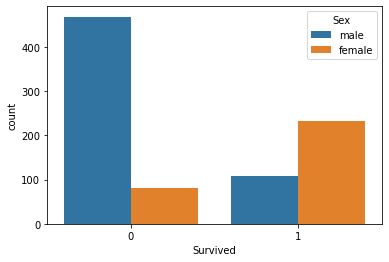

In [15]:
sns.countplot(survived,hue='Sex',data=dataset)

*From the visuals we can conclude that more `females have survived than males`,so we can say `Sex` is an important feature,hence we `can't eliminate` it.`*

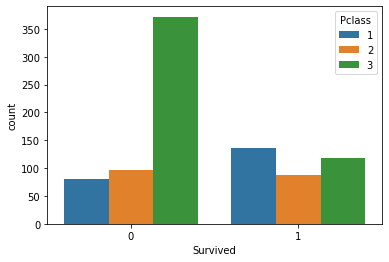

In [16]:
sns.countplot(survived,hue='Pclass',data=dataset)

*Clearly using visuals we can see that people of `higher class survived more`
Hence we can conclude that `Pclass` is also an imp feature therefore,`we can't eliminate it` as well* 

In [17]:
y=dataset['Survived']

In [18]:
X=dataset[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Cabin', 'Embarked']]

In [19]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


*Yay!! So lets say we have selected our features but observe that we have features which are string-type **Categorical Variables** but Machine Learning doesn't understands this type*

In [20]:
sex=dataset['Sex']

In [21]:
sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [22]:
pd.get_dummies(sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [23]:
sex=pd.get_dummies(sex,drop_first=True)

In [24]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


## One-Hot Encoding
`> pd.get_dummies() will do label encoding,one-hot encoding & creates the table `
`> Here `

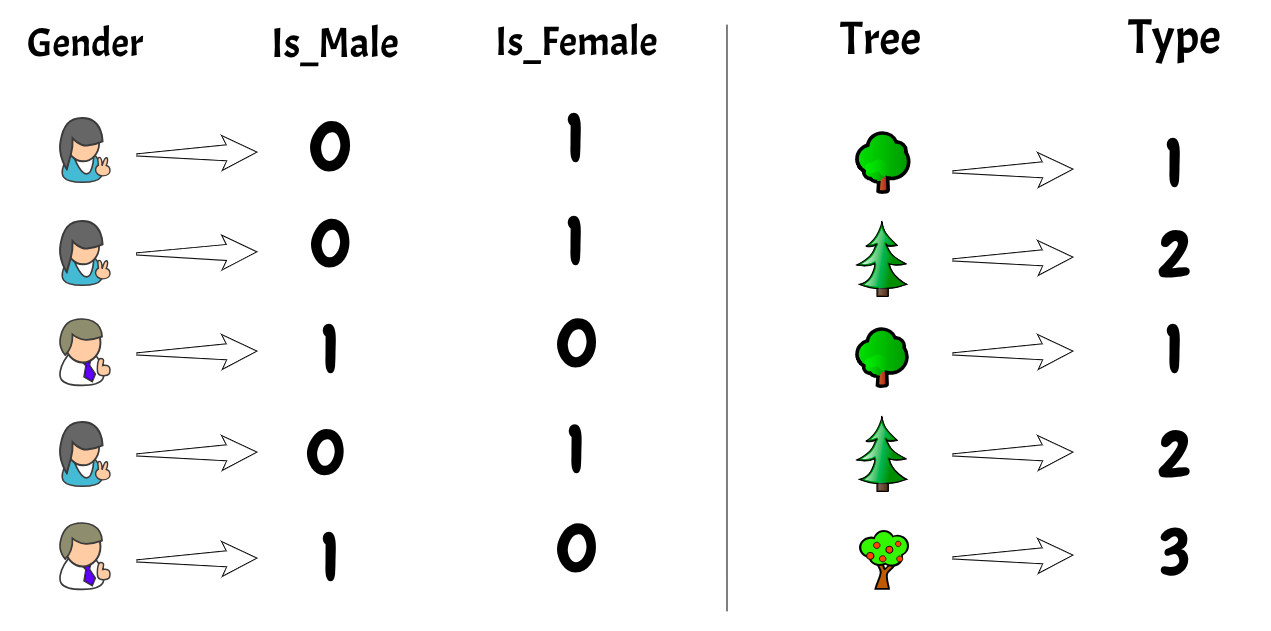

 #### `Pclass`,`SibSp` are categorical & `Embarked` is also somewhat categorical

In [25]:
pclass=dataset['Pclass']

In [26]:
pclass=pd.get_dummies(pclass,drop_first=True)

In [27]:
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


In [30]:
Sibsp=dataset['SibSp']

In [31]:
Sibsp=pd.get_dummies(Sibsp,drop_first=True)

In [32]:
Sibsp

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


## Handling the Missing Values

#### `Cabin` is *not categorical* as there are no common categories but its of string-type
* #### Also observe that in `Cabin`, lot of values are missing so ML can't work if there are `missing values`- `NAN` or `null` so its imp to fill out such values or remove such kind of features if the feature is not imp.
* #### Removing or filling missing values is also a part of Pre Processing
* #### `Age` has also few missing values but `Cabin` has lot of missing values.
* #### Looking for missing values in `big dataset` might not be possible so we can use visuals.

In [35]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### `isnull()` returns Boolean Values
> **`True`** - Missing value
> **`False`**- Not a missing value

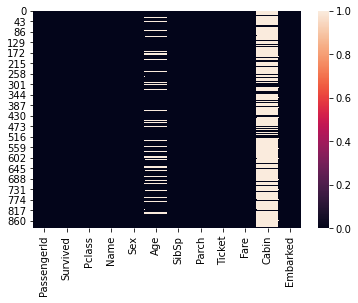

In [36]:
sns.heatmap(dataset.isnull())

*`heatmap()` accepts Boolean Values*
> `White color` denotes missing values
* In `Cabin`, lot of values are missing (around 95%)
* In `Age`, few values are missing (around 5%)

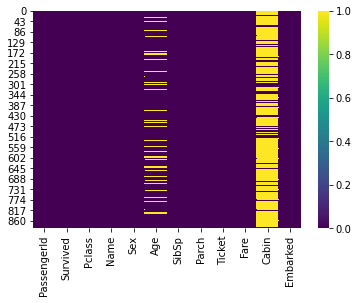

In [40]:
sns.heatmap(dataset.isnull(), cmap='viridis')

In [45]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


* **X.drop('Cabin')**
This won't work! As **`S.No or rows`** is considered as **`axis=0`** & **`Column names`** is considered as **`axis=1`**.
So **`bydefault`** Pandas work row-wise(axis=0) so if we use above func then it will look for `Cabin` in the row but actually `Cabin` is a column so instead of dropping row-wise, we would have to drop the `Cabin` column-wise(axis=1)*


In [46]:
X.drop('Cabin',axis=1)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


In [47]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


See `Cabin` again come up even after dropping as `drop()` removes the columns **temporaily**.To drop the column **permanently** we would have to use **`inplace=True`**

In [48]:
X.drop('Cabin',axis=1,inplace=True)

C:\Users\sande\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


#### All this process is also known as **`DATA CLEANING`**
> So we can say **`Handling the missing values`** is a part of Data Cleaning
* Age has few missing values, so we won't remove `Age` feature or Assume may be `Age` has lot of missing values but if `Age` is imp then we can't drop the `Age` 
* Suppose there are millions of records & 1% records of Age are missing, so it won't impact the data.Then maybe we can remove those rows or we can observe trend **(graphically)** b/w `Age` & `Pclass` & find average `Age` of people for diff. classes-1st,2nd,3rd & then fill those missing values with these calculate avg. values either manually or by writing a code

In [51]:
age=dataset['Age']

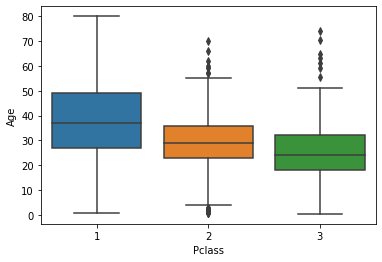

In [53]:
sns.boxplot(y='Age',x='Pclass',data=dataset)

In [88]:
def fill_missing(cols):
    Pclass=cols[1]
    age=cols[0]
    if pd.isnull(age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        elif Pclass==3:
            return 25
        else:
            return 30
    else:
        return age

In [89]:
age=dataset[['Age','Pclass']].apply(fill_missing,axis=1)

In [91]:
X['Age']=age

<ipython-input-91-f9a9b4991595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=age


In [92]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,25.0,1,2,S
889,1,male,26.0,0,0,C


In [95]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

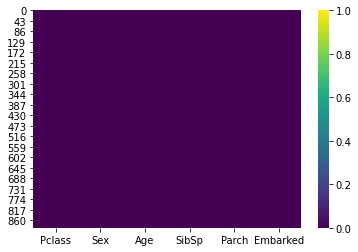

In [96]:
sns.heatmap(X.isnull(),cmap='viridis')

✌Yay!! Now our dataset is cleaned, no missing values are there , so we can do further analysis😃